## Class work 2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import lxml
import pandas as pd
from lxml import objectify, etree, html
import json
from pandas import read_csv
from pymystem3 import Mystem
from itertools import combinations
from collections import Counter

In [2]:
m = Mystem()
xml = open('texts.xml', encoding='utf-8').read()
parser = etree.XMLParser(encoding='utf-8')
root = etree.fromstring(xml.encode('utf-8'), parser)

In [3]:
dictLemmas = ({})

for topic in root:       
    texts = []
    for text in topic:
        sentances = []
        for sent in text:
            sentances.append(sent.text)
        builder = ""
        for s in sentances:
            if s is not None:
                builder += " " + s
        texts.append((text.attrib['Title'], builder))
    dictLemmas[topic.attrib["TopicName"]] = texts

In [4]:
dictLemmas

{'culture': [('Партнерша Ведерникова по ГАБТ назвала его человеком светлой энергетики',
   ' 271 1191 1094 12282 9849 12682 1460 907 10923 6880 1086 7388 7729 954 11027 3401 510 9624 1938 12311  1191 10112 1467 1732 1528 2095  4529 1192 6764 8251 2702 1268 5743 4778  2702 12786 5016 12736 6465 1094 6260 7274 2162  11177 6133 5886 5784 6880 1720 6689 11177 6126 7950 6880 12748  12735 1094 12282 9849 12682 6096 2724 1460 907  5784 3130 9709 12270 1720  6880 1094 3772 805 5742 1541 3856  6880 1689 1719 11566 1689 11579 10077 12387 11157 8690  10971 12282 2777 3130 2767 2767 10077 12311  271 11874 1094 8273 7385 6880 6621 9873 11597 676 2118 4639 11066 6880 9309 7385  6447 6077 11177 5815 6910 10908 893 271 11874  6880 1872 4523 7047 6160 2974 3871 9591 2011 9860 7161 6881  271 11874 11726 9849 9571 2516 10971 2516 11726 11177 9772 12128 10077 510 '),
  ('Солистка Большого театра Татьяна Ерастова назвала Ведерникова самородком',
   ' 5980 510 9624 10390 954 11027 11010 3019 5893 11726 3596

In [5]:
dictionary = read_csv('dictionary.csv',';', encoding='cp1251')
dict_words = dictionary['Words'].get_values()
invDictLemmas = ({})
for word in dict_words:
    invDictLemmas[word] = []
for topic in dictLemmas.keys():
    for i in range(0, len(dictLemmas[topic])):
        text = dictLemmas[topic][i][1]
        listWords = text.split(" ")
        for w in listWords:
            if w !='':
                if len(invDictLemmas[dict_words[int(w)]])==0 or len(invDictLemmas[dict_words[int(w)]])!=0 and (invDictLemmas[dict_words[int(w)]][-1][0] != topic or invDictLemmas[dict_words[int(w)]][-1][1] != i):
                    invDictLemmas[dict_words[int(w)]].append((topic, i))    

In [6]:
invDictLemmas

{'БДТ': [('culture', 16), ('culture', 71)],
 'БЗК': [('culture', 130)],
 'БМП': [('world', 19), ('world', 48), ('world', 131), ('world', 198)],
 'ГД': [('society', 10),
  ('society', 16),
  ('society', 18),
  ('politics', 128),
  ('politics', 143),
  ('world', 158),
  ('world', 179),
  ('culture', 24),
  ('culture', 171),
  ('culture', 174)],
 'ГУ': [('society', 45), ('society', 50)],
 'ДМС': [('society', 101)],
 'ДНР': [('politics', 36),
  ('world', 19),
  ('world', 135),
  ('world', 146),
  ('world', 164),
  ('world', 169),
  ('world', 174),
  ('world', 193)],
 'ДПС': [('society', 8)],
 'Духless': [('culture', 145)],
 'Ен': [('world', 157)],
 'ЗРК': [('world', 136)],
 'КПП': [('world', 117)],
 'ЛДНР': [('world', 193)],
 'ЛНР': [('politics', 36),
  ('world', 131),
  ('world', 146),
  ('world', 164),
  ('world', 169),
  ('world', 174),
  ('world', 193),
  ('world', 198),
  ('world', 199)],
 'ЛССП': [('society', 159)],
 'М2': [('world', 136)],
 'МГЮА': [('society', 176)],
 'ММКФ': [('cu

In [7]:
def find(query):
    result = pd.DataFrame(columns=["Words", "Count of text"])
    query = m.lemmatize(query)
    query = [x for x in query if ' ' not in x and '\n' not in x]
    for i in range(1, len(query)+1):
        for comb in combinations(query, i):
            res_comb = []
            for word in comb:
                try:
                    for pair in invDictLemmas[word]:
                        res_comb.append(pair)
                except:
                    pass
            counter=Counter(res_comb)
            counter = [(value, key) for key, value in sorted([(v,k) for k,v in counter.items()], reverse=True)]
            i = 0
            for pair in counter:
                if(pair[1] == len(comb)):
                    i += 1
                else:
                    break
            result = result.append({"Words":comb,"Count of text":i},ignore_index=True)
    return result

In [8]:
res = find("культурный вечер россии")
res

Words  Count of text
0                (культурный,)           15.0
1                     (вечер,)           32.0
2                    (россия,)          382.0
3          (культурный, вечер)            0.0
4         (культурный, россия)           12.0
5              (вечер, россия)           11.0
6  (культурный, вечер, россия)            0.0

## Home work 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
texts = pd.DataFrame(columns=["Id","Topic","Title", "Text"])
for topic in dictLemmas.keys():
    i = 0
    for text in dictLemmas[topic]:
        texts = texts.append({"Id":int(i),"Topic" : topic,"Title":text[0], "Text" : text[1]}, ignore_index=True)
        i += 1
texts

Id    Topic                                              Title  \
0      0.0  society  Путин призвал открыть программу по созданию мо...   
1      1.0  society       Эксперт раскритиковал сокращение штата ГИБДД   
2      2.0  society  Диетолог дал рекомендации по питанию после нов...   
3      3.0  society  В Крыму бабушке вернули отобранного органами о...   
4      4.0  society               CNN показал новогодний подарок от RT   
5      5.0  society  Врач рассказал, когда лучше начинать лечение п...   
6      6.0  society  В Госдуме готовят проект о льготной аренде для...   
7      7.0  society  Замглавы Минобрнауки России покинет свой пост,...   
8      8.0  society         Штат ГАИ сократили на десять тысяч человек   
9      9.0  society  В России вырастут субсидии для переехавших в д...   
10    10.0  society  Депутат Госдумы предложил сократить новогодние...   
11    11.0  society  Комитет Госдумы предложил приравнять электронн...   
12    12.0  society  Минтруд подготовит проект о повышении МРОТ до ...   
13    13.0  society  В Госдуму внесли проект о посещении пациента в...   
14    14.0  society  Путин пообещал приравнять МРОТ к прожиточному ...   
15    15.0  society  В Нижегородской области спасли черепаху, попав...   
16    16.0  society  Госдума отклонила законопроект о двух пенсиях ...   
17    17.0  society  В России появится виртуальный помощник по здор...   
18    18.0  society  В Госдуме удивлены политикой признания российс...   
19    19.0  society  Госдума отклонила законопроект о помощи находя...   
20    20.0  society  Полуфинал конкурса "Лидеры России" по ЦФО стар...   
21    21.0  society          В Ростове-на-Дону начали продавать воздух   
22    22.0  society  В январе в книжных магазинах появится книга "С...   
23    23.0  society  Путин встретится с победителями конкурса сочин...   
24    24.0  society  Дивы Instagram: десятка самых популярных росси...   
25    25.0  society  Конституционный суд запретил безосновательно а...   
26    26.0  society  Путин заявил, что за риски при покупке криптов...   
27    27.0  society  Комитет ГД поддержал проект о противодействии ...   
28    28.0  society  Путин пообещал подумать о дальнейших послаблен...   
29    29.0  society  Путин считает возможным ввести звание "Заслуже...   
..     ...      ...                                                ...   
810  180.0  culture  Стали известны номинанты на "Оскар" за лучшую ...   
811  181.0  culture  Минкультуры отозвало прокатное удостоверение у...   
812  182.0  culture  Элтон Джон заявил, что прекратит гастрольную д...   
813  183.0  culture  Гастроли знаменитого японского театра Кабуки п...   
814  184.0  culture  СМИ назвали причину смерти актера, сыгравшего ...   
815  185.0  culture     В Туле установили мемориальную доску Высоцкому   
816  186.0  culture  Французский режиссер представит в Москве свой ...   
817  187.0  culture  Мединский направит гонорар за постановку его р...   
818  188.0  culture  Члены Общественного совета назвали комедию "См...   
819  189.0  culture  Лувр временно закрывает отдел исламского искус...   
820  190.0  culture  Путин высоко оценил музей Владимира Высоцкого ...   
821  191.0  culture  Путин предложил организовать молодежный фестив...   
822  192.0  culture  Олег Табаков остается в больнице, сообщили в п...   
823  193.0  culture  СМИ сообщили о возможном завершении гастрольно...   
824  194.0  culture  Минкультуры отозвало прокатное удостоверение у...   
825  195.0  culture  Кинопремьеры недели: новый Ханеке и последняя ...   
826  196.0  culture  Солистка The Cranberries планировала запись но...   
827  197.0  culture  Загадка якутского режиссера: как учитель покор...   
828  198.0  culture         Путин побывает в доме Высоцкого на Таганке   
829  199.0  culture  Песков вновь прокомментировал ситуацию с прока...   
830  200.0  culture  Друг Армена Джигарханяна рассказал о состоянии...   
831  201.0  culture       Медведев назвал Башмета особенным музыкантом   
832  202.0  

In [11]:
vector = CountVectorizer()
tfidf = TfidfTransformer()

x = vector.fit_transform(texts.Text)
x = tfidf.fit_transform(x)
x.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [12]:
def get_query_text(query):
    query = m.lemmatize(query)
    query = [x for x in query if ' ' not in x and '\n' not in x]
    query_index = ' '.join([str(list(dictionary['Words'].get_values()).index(x)) for x in query])
    queryVec = vector.transform([query_index])
    queryTfidf = tfidf.transform(queryVec)
    cosArray = []
    for i, j in enumerate(x):
        res = cosine_similarity(j, queryTfidf)
        cosArray.append([i, res[0][0]])
    cosArray = sorted(cosArray, key=lambda k: k[1], reverse=True)
    for i in range(0, len(cosArray)):
        if(cosArray[i][1] == 0):
            break
        row = texts.iloc[cosArray[i][0]]
        print('The coincidence {0}%\nId:{1}. {2}\n{3}\n'.format(round(cosArray[i][1]*100,2),int(row.Id),row.Title,row.Text))

In [13]:
get_query_text('Культурный вечер россии')

The coincidence 15.2%
Id:35. Важно, кто пишет ноты: российско-австрийский год музыки открылся в Вене
 11209 12221 7146 7499 9622 112 2095 5742 12336 10470 1213  12221 8929 8205 9624 6071 4523 5644 9622 5744  5815 8557 8660 8422 9622 2479 11217 12364 3300 5508 4778 9624 303 5209 10550 8444 9624 7729 5360 4781 10483 5556 12444  7085 11366 5742 8204 9687 113 2703 5104 12336 7815 3922 3172 9622 112 2095 11366 11537 5815 11157 12387 2095 5742 10658 2974 5034 8757  2095 5742 10658 5034 8757 2095 11366 8185 5784 1094 8426 6074 2201 6540 10755 6468 11370 5743 4781 8770 10077 8204  7729 10172 8204 2351 954 10098 10339 11157 12387 11177 9624 10468 8715 2095 5742 1429 113  2095 5742 6571 1094 7274 3773  5784 8222 9893 10971 8730 4612 3423 1268 11816 3493 113 7161 8204  3982 7912 3300 5508 4778 9687 303 5209 9624 113 8755 9116 7169 10896 11366 11036 2095  5784 6077 8955 11366  4781 11366 1094 10434 1268 2095 5742 7161 5208  1109 4746 7651 6498 8523 7146 9622 112 2095 5742 10550 8444 9624 7729 5360

## Class work 3

In [14]:
classes = {'society':0,'politics':1, 'world':2 ,'culture':3}

In [15]:
X = texts.Text
Y = [classes[x] for x in texts.Topic]

In [16]:
x.shape

(840, 12844)

In [17]:
x = vector.fit_transform(X)
x = tfidf.fit_transform(x)
x.toarray().shape

(840, 12844)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.15, random_state = 3)

In [19]:
print("Размер тренировочной выборки {0}\nРазмер тестовой выборкиn {1}".format(X_train.shape,X_test.shape))

Размер тренировочной выборки (714, 12844)
Размер тестовой выборкиn (126, 12844)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding,GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [21]:
y_predict_labels = ["Logistic regression","Linear SVC","Random forest","Gradient boosting","One vs One", "One vs All"]
y_predicts=[]

In [22]:
models_labels=["Logistic regression","Linear SVC","Random forest","Gradient boosting"]
models = []
models.append(make_pipeline(RandomTreesEmbedding(max_depth=3, n_estimators=1000,
    random_state=0),LogisticRegression()).fit(X_train, y_train))
models.append(LinearSVC().fit(X_train, y_train))
models.append(RandomForestClassifier(n_estimators=1000).fit(X_train, y_train))
models.append(GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train))

Logistic regression

             precision    recall  f1-score   support

    society       0.61      0.54      0.57        41
   politics       0.61      0.73      0.67        30
      world       0.76      0.57      0.65        28
    culture       0.67      0.81      0.73        27

avg / total       0.66      0.65      0.65       126




Linear SVC

             precision    recall  f1-score   support

    society       0.82      0.88      0.85        41
   politics       0.81      0.83      0.82        30
      world       0.92      0.86      0.89        28
    culture       0.96      0.89      0.92        27

avg / total       0.87      0.87      0.87       126




Random forest

             precision    recall  f1-score   support

    society       0.80      0.78      0.79        41
   politics       0.81      0.87      0.84        30
      world       0.80      0.86      0.83        28
    culture       1.00      0.89      0.94        27

avg / total       0.85      0.84     

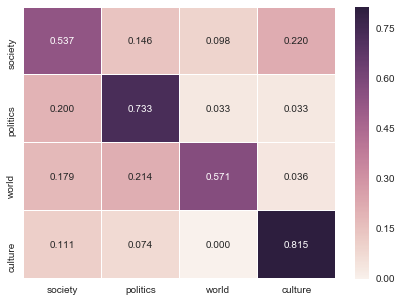

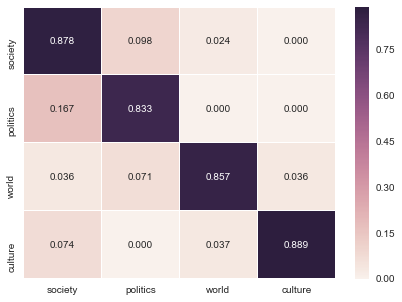

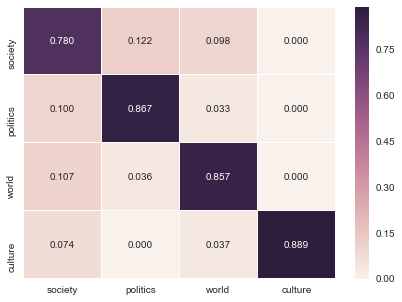

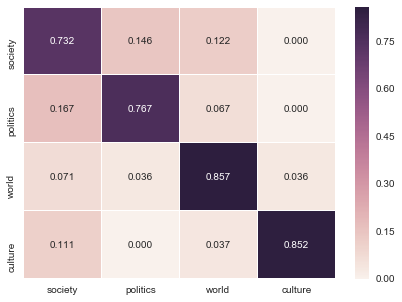

In [23]:
for i in range(len(models)):
    print(models_labels[i]+'\n')
    y_predict = models[i].predict(X_test.toarray())
    y_predicts.append(y_predict)
    print(classification_report(y_test, y_predict, target_names=['society','politics','world','culture']))
    matrix = confusion_matrix(y_test, y_predict)
    matrix  = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize = (7,5))
    sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=['society','politics','world','culture'], yticklabels=['society','politics','world','culture'])
    plt.figure(figsize = (11,11))
    print('\n\n')

feature importances for random forest

(0, 0.0001)

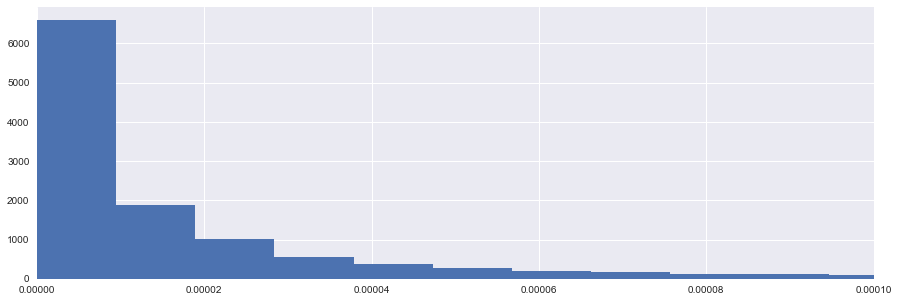

In [24]:
plt.figure(figsize=(15, 5))

plt.hist(models[2].feature_importances_, bins=1000)
plt.grid(True)
plt.xlim(0, 0.0001)

In [25]:
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100)).fit(X_train, y_train)
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

In [26]:
print(X_train_transformed.shape,X_test_transformed.shape)

(714, 1918) (126, 1918)


In [27]:
models_new = []
models_new.append(LogisticRegression().fit(X_train_transformed, y_train))
models_new.append(LinearSVC().fit(X_train_transformed, y_train))
models_new.append(RandomForestClassifier(n_estimators=1000).fit(X_train_transformed, y_train))
models_new.append(GradientBoostingClassifier(n_estimators=100).fit(X_train_transformed, y_train))

Logistic regression

             precision    recall  f1-score   support

    society       0.85      0.85      0.85        41
   politics       0.80      0.80      0.80        30
      world       0.84      0.93      0.88        28
    culture       1.00      0.89      0.94        27

avg / total       0.87      0.87      0.87       126



C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)





Linear SVC

             precision    recall  f1-score   support

    society       0.83      0.83      0.83        41
   politics       0.81      0.83      0.82        30
      world       0.86      0.89      0.88        28
    culture       0.96      0.89      0.92        27

avg / total       0.86      0.86      0.86       126




Random forest

             precision    recall  f1-score   support

    society       0.79      0.76      0.77        41
   politics       0.79      0.87      0.83        30
      world       0.80      0.86      0.83        28
    culture       1.00      0.89      0.94        27

avg / total       0.84      0.83      0.83       126




Gradient boosting

             precision    recall  f1-score   support

    society       0.74      0.78      0.76        41
   politics       0.76      0.73      0.75        30
      world       0.74      0.82      0.78        28
    culture       1.00      0.85      0.92        27

avg / total       0.80      0.79    

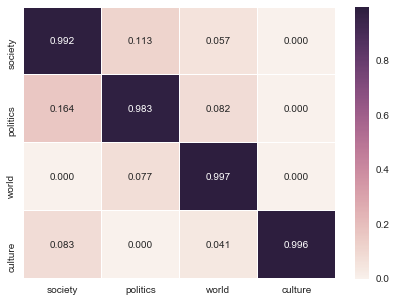

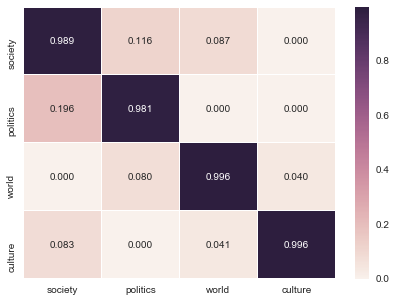

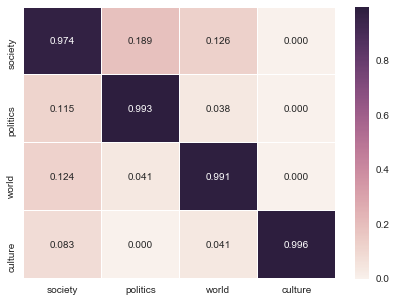

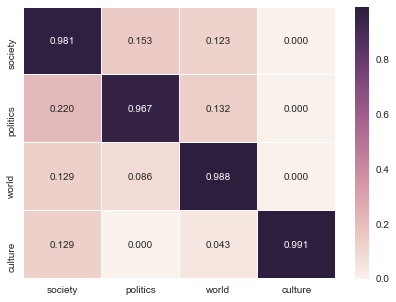

In [28]:
for i in range(len(models)):
    print(models_labels[i]+'\n')
    y_predict = models_new[i].predict(X_test_transformed.toarray())
    y_predicts.append(y_predict)
    print(classification_report(y_test, y_predict, target_names=['society','politics','world','culture']))
    matrix = normalize(confusion_matrix(y_test, y_predict))
    plt.figure(figsize = (7,5))
    sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=['society','politics','world','culture'], yticklabels=['society','politics','world','culture'])
    plt.figure(figsize = (11,11))
    print('\n\n')

In [29]:
model_labels_new = ["One vs One", "One vs All"]
models_bin=[]
models_bin.append(OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train))
models_bin.append(OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train))

One vs One

             precision    recall  f1-score   support

    society       0.80      0.88      0.84        41
   politics       0.81      0.83      0.82        30
      world       0.89      0.86      0.87        28
    culture       1.00      0.85      0.92        27

avg / total       0.86      0.86      0.86       126




One vs All

             precision    recall  f1-score   support

    society       0.82      0.88      0.85        41
   politics       0.81      0.83      0.82        30
      world       0.92      0.86      0.89        28
    culture       0.96      0.89      0.92        27

avg / total       0.87      0.87      0.87       126






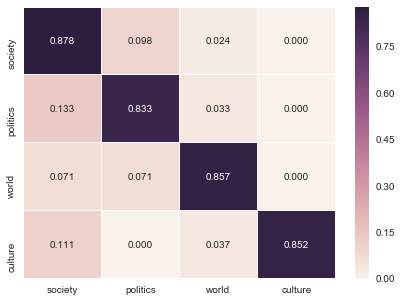

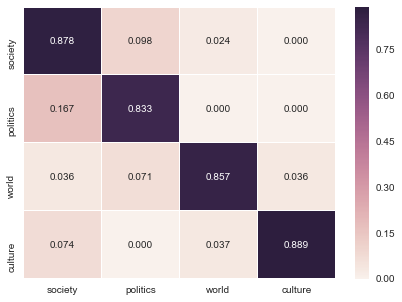

In [30]:
for i in range(len(models_bin)):
    print(model_labels_new[i]+'\n')
    y_predict = models_bin[i].predict(X_test.toarray())
    print(classification_report(y_test, y_predict, target_names=['society','politics','world','culture']))
    matrix = confusion_matrix(y_test, y_predict)
    matrix  = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize = (7,5))
    sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=['society','politics','world','culture'], yticklabels=['society','politics','world','culture'])
    plt.figure(figsize = (11,11))
    print('\n\n')

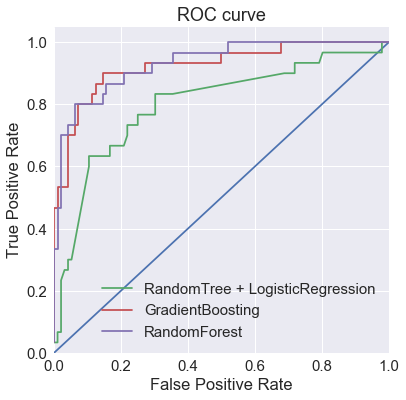

In [31]:
from sklearn.metrics import roc_curve

models_label=['RandomTree + LogisticRegression','GradientBoosting','RandomForest']
models=[]
models.append(make_pipeline(RandomTreesEmbedding(max_depth=3, n_estimators=100, random_state=0), LogisticRegression()).fit(X_train,y_train))
models.append(GradientBoostingClassifier(n_estimators=100).fit(X_train,y_train))
models.append(RandomForestClassifier(max_depth=3, n_estimators=1000).fit(X_train,y_train))

sb.set(font_scale=1.5)
sb.set_color_codes("muted")

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
for i in range(len(models)):
    fpr, tpr,thresholds = roc_curve(y_test, models[i].predict_proba(X_test.toarray())[:,1],pos_label=1)
    plt.plot(fpr, tpr, label=models_label[i])
plt.legend(loc='best')
plt.show()

In [32]:
ensemble_models=[]
ensemble_labels = ["soft","hard"]
ensemble_models.append(VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=3).fit(X_train, y_train))

ensemble_models.append(VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=3).fit(X_train, y_train))

soft

             precision    recall  f1-score   support

    society       0.80      0.88      0.84        41
   politics       0.81      0.83      0.82        30
      world       0.89      0.86      0.87        28
    culture       1.00      0.85      0.92        27

avg / total       0.86      0.86      0.86       126




hard

             precision    recall  f1-score   support

    society       0.82      0.88      0.85        41
   politics       0.81      0.83      0.82        30
      world       0.92      0.86      0.89        28
    culture       0.96      0.89      0.92        27

avg / total       0.87      0.87      0.87       126






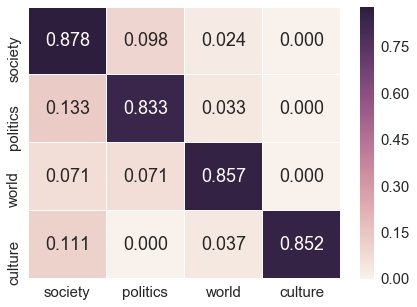

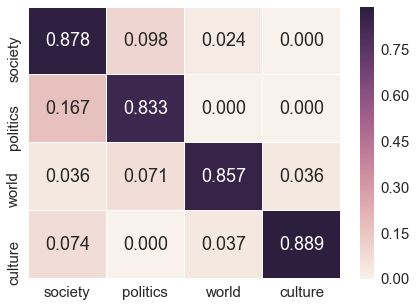

In [33]:
for i in range(len(ensemble_models)):
    print(ensemble_labels[i]+'\n')
    y_predict = models_bin[i].predict(X_test.toarray())
    print(classification_report(y_test, y_predict, target_names=['society','politics','world','culture']))
    matrix = confusion_matrix(y_test, y_predict)
    matrix  = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize = (7,5))
    sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=['society','politics','world','culture'], yticklabels=['society','politics','world','culture'])
    plt.figure(figsize = (11,11))
    print('\n\n')

## Home work 3

In [34]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

In [35]:
x.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
keys = [dict_words[int(i)] for i in list(vector.vocabulary_.keys())]
values = list(vector.vocabulary_.values())

_ind = np.argsort(values)
words_sorted = np.asarray(keys)[_ind]
count_of_theme = 6
svd = TruncatedSVD(n_components=count_of_theme, n_iter=100).fit(x)

['год' 'он' 'россия' 'кандидат' 'по' 'президент' 'быть' 'не' 'что' 'на']
[ 0.12947142  0.13580465  0.13628966  0.14659986  0.14934585  0.15299665
  0.15432063  0.16447555  0.20424449  0.2366917 ]

['собирать' 'штаб' 'кампания' 'фонд' 'выборы' 'цик' 'партия'
 'избирательный' 'подпись' 'кандидат']
[ 0.12089326  0.12145334  0.13391901  0.14016988  0.15764941  0.19244427
  0.21499714  0.27297698  0.28997342  0.36785034]

['актер' 'режиссер' 'михаил' 'картина' 'ведерников' 'год' 'артист'
 'державин' 'фильм' 'театр']
[ 0.09200451  0.10513737  0.11127559  0.11211129  0.11224349  0.11630314
  0.15475179  0.18818602  0.24588272  0.3058764 ]

['смерть' 'оскар' 'минкультуры' 'режиссер' 'прокат' 'сталин' 'прокатный'
 'удостоверение' 'картина' 'фильм']
[ 0.0859567   0.09274046  0.10484074  0.10727613  0.11304816  0.13481941
  0.15490772  0.1595564   0.17993067  0.44918809]

['сопредседатель' 'дмитрий' 'пресс' 'президент' 'кондрашов' 'песков'
 'секретарь' 'владимир' 'штаб' 'путин']
[ 0.08374726  0.0

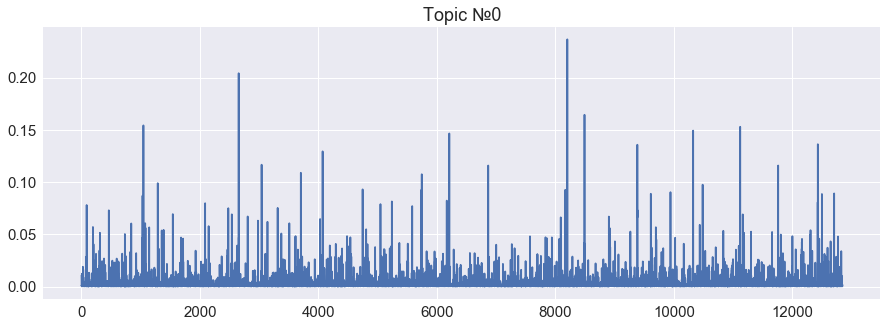

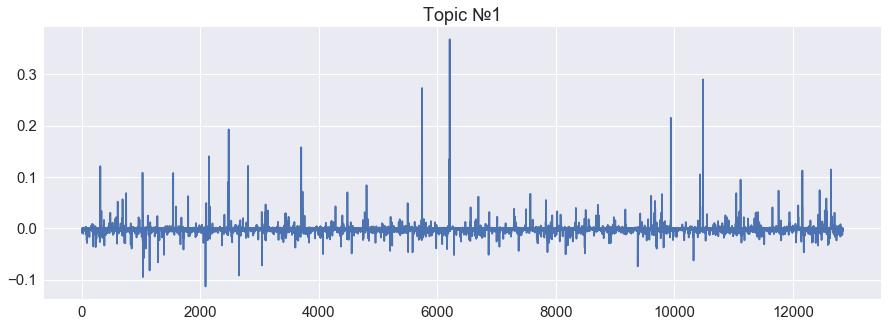

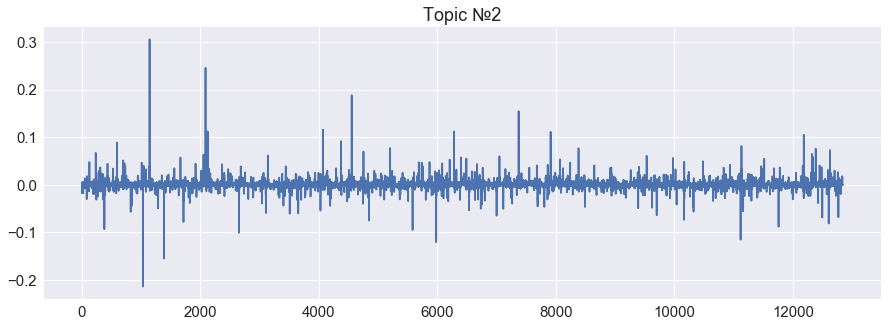

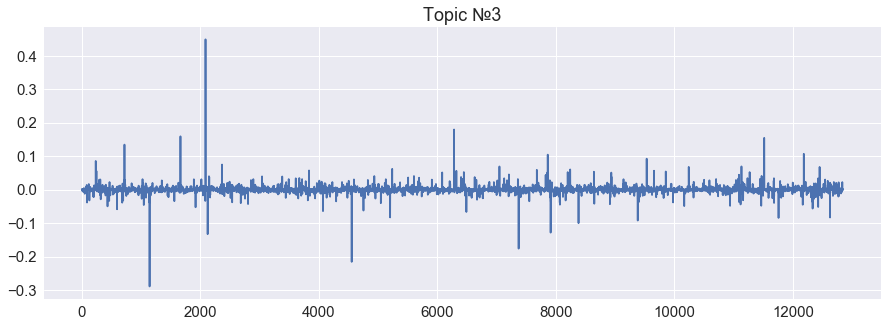

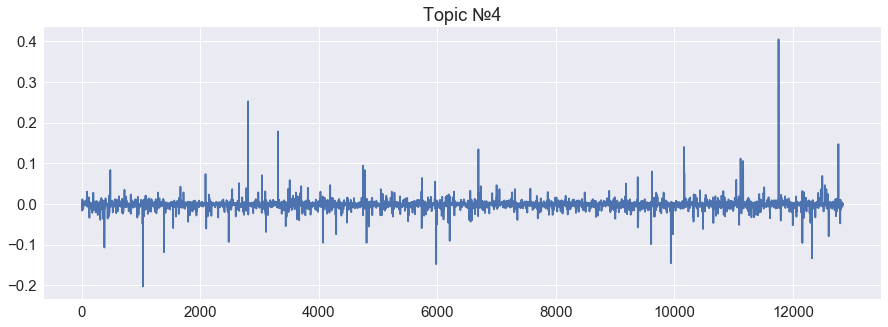

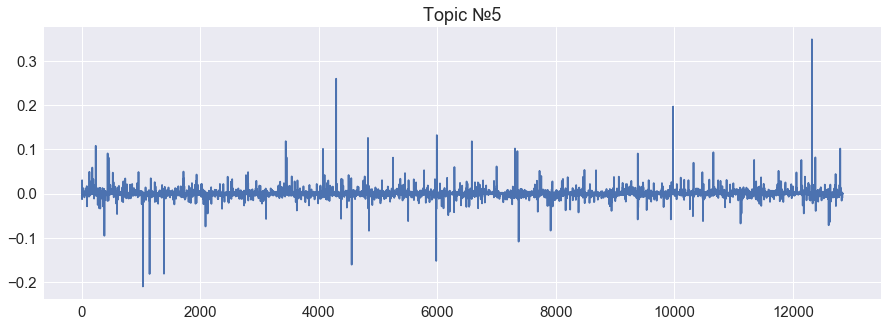

In [37]:
k=10
for i in range(count_of_theme):
    ind = np.argsort(svd.components_[i])[-10:]
    print(words_sorted[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()
    
    plt.figure(figsize=(15, 5))
    plt.plot(svd.components_[i])
    plt.title("Topic №" + str(i))
    plt.grid(True)

## LDA

In [38]:
from gensim import corpora, models

C:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [39]:
badWords = ['на','не','по','что','он','из','это','за','то','от','он','она','они','как','для','этот','который']
sentances =  [[dict_words[int(i)] for i in j.split(' ') if i != '' and dict_words[int(i)] not in badWords] for j in texts.Text]
dictionary = corpora.Dictionary(sentances)
X_bow = [dictionary.doc2bow(text) for text in sentances]

In [40]:
lda_gensim = models.ldamodel.LdaModel(X_bow, num_topics=count_of_theme, id2word=dictionary, iterations=100)
lda_gensim.print_topics()

[(0,
  '0.013*"быть" + 0.011*"год" + 0.007*"россия" + 0.005*"его" + 0.004*"театр" + 0.004*"президент" + 0.004*"человек" + 0.004*"свой" + 0.004*"заявлять" + 0.004*"также"'),
 (1,
  '0.011*"быть" + 0.008*"год" + 0.007*"мы" + 0.005*"свой" + 0.004*"россия" + 0.004*"фильм" + 0.004*"сказать" + 0.004*"сообщать" + 0.003*"сша" + 0.003*"его"'),
 (2,
  '0.008*"год" + 0.007*"быть" + 0.005*"россия" + 0.004*"сообщать" + 0.004*"президент" + 0.004*"заявлять" + 0.004*"также" + 0.004*"его" + 0.004*"весь" + 0.003*"свой"'),
 (3,
  '0.010*"быть" + 0.008*"год" + 0.007*"россия" + 0.006*"фильм" + 0.005*"президент" + 0.004*"мы" + 0.004*"его" + 0.004*"свой" + 0.004*"но" + 0.004*"заявлять"'),
 (4,
  '0.014*"быть" + 0.006*"россия" + 0.005*"год" + 0.004*"сказать" + 0.004*"мы" + 0.004*"сообщать" + 0.004*"российский" + 0.004*"мочь" + 0.004*"человек" + 0.004*"свой"'),
 (5,
  '0.012*"президент" + 0.011*"быть" + 0.009*"год" + 0.009*"кандидат" + 0.008*"россия" + 0.005*"сообщать" + 0.005*"свой" + 0.005*"выборы" + 0.005*"

Исходные темы: ['society','politics','world','culture']. Полученные результаты больше относятся к темам 'politics' и 'world'. Скорее всего это связано с тем, что к каким-либо темам не относились новости, везде затрагивают Россию

## Sklearn

In [41]:
from sklearn.decomposition import LatentDirichletAllocation

In [42]:
lda_sklearn = LatentDirichletAllocation(n_topics=count_of_theme, max_iter=15, batch_size=10, evaluate_every=1, verbose=1, 
                                        n_jobs=4, learning_method='batch').fit(x)

iteration: 1, perplexity: 80448.8982
iteration: 2, perplexity: 69201.8868
iteration: 3, perplexity: 53567.4358
iteration: 4, perplexity: 41533.6813
iteration: 5, perplexity: 36074.1826
iteration: 6, perplexity: 33552.9276
iteration: 7, perplexity: 32272.6115
iteration: 8, perplexity: 31461.3477
iteration: 9, perplexity: 30887.1431
iteration: 10, perplexity: 30436.6582
iteration: 11, perplexity: 30073.4406
iteration: 12, perplexity: 29787.5384
iteration: 13, perplexity: 29572.0962
iteration: 14, perplexity: 29388.2855
iteration: 15, perplexity: 29253.4809


In [43]:
lda_sklearn.components_.shape

(6, 12844)

In [44]:
for i in range(count_of_theme):
    ind = np.argsort(lda_sklearn.components_[i])[-k:]
    print(words_sorted[ind])
    print(np.sort(svd.components_[i])[-k:])
    print()

['который' 'россия' 'он' 'президент' 'год' 'быть' 'не' 'по' 'что' 'на']
[ 0.12947142  0.13580465  0.13628966  0.14659986  0.14934585  0.15299665
  0.15432063  0.16447555  0.20424449  0.2366917 ]

['патриот' 'вич' 'искусственный' 'доротея' 'табаков' 'забастовка' 'афины'
 'дютуа' 'эквадор' 'ассанж']
[ 0.12089326  0.12145334  0.13391901  0.14016988  0.15764941  0.19244427
  0.21499714  0.27297698  0.28997342  0.36785034]

['нильс' 'песец' 'фас' 'коляда' 'хейль' 'донецк' 'диего' 'гребенщиков'
 'актюбинский' 'шаинский']
[ 0.09200451  0.10513737  0.11127559  0.11211129  0.11224349  0.11630314
  0.15475179  0.18818602  0.24588272  0.3058764 ]

['коллапс' 'валдай' 'курсант' 'дерипаска' 'янкилевский' 'пациент' 'солист'
 'гейтс' 'манафорт' 'ведерников']
[ 0.0859567   0.09274046  0.10484074  0.10727613  0.11304816  0.13481941
  0.15490772  0.1595564   0.17993067  0.44918809]

['брянск' 'перестановка' 'керченский' 'кларк' 'львица' 'двигатель' 'шелтон'
 'паромный' 'заповедник' 'переправа']
[ 0.0837

sklearn выдал результаты однозначно лучше, чем gensim. Тут хотя бы наблюдается разнообразие тем